In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.DataFrame.from_records([ json.loads(l) for l in open("../sum.json") ])
df["rate"] = df["length"] / df["time"]

In [65]:
df

,arch,count,host,language,language_ver,length,mem_size,name,operation,os,os_ver,samples,time,timestamp,type,rate
0,x86_64,10,sorrel.local,python,3.5.1,1024,8192,numpy.sum,sum,Darwin,14.5.0,100,0.000003,2016-08-08T19:52:15Z,f64,3.295784e+08
1,x86_64,10,sorrel.local,python,3.5.1,2048,16384,numpy.sum,sum,Darwin,14.5.0,100,0.000004,2016-08-08T19:52:15Z,f64,5.696799e+08
2,x86_64,10,sorrel.local,python,3.5.1,4096,32768,numpy.sum,sum,Darwin,14.5.0,100,0.000005,2016-08-08T19:52:15Z,f64,9.009725e+08
3,x86_64,10,sorrel.local,python,3.5.1,8192,65536,numpy.sum,sum,Darwin,14.5.0,100,0.000006,2016-08-08T19:52:15Z,f64,1.284637e+09
4,x86_64,1,sorrel.local,python,3.5.1,16384,131072,numpy.sum,sum,Darwin,14.5.0,100,0.000011,2016-08-08T19:52:15Z,f64,1.502430e+09
5,x86_64,1,sorrel.local,python,3.5.1,32768,262144,numpy.sum,sum,Darwin,14.5.0,100,0.000020,2016-08-08T19:52:15Z,f64,1.621456e+09
6,x86_64,1,sorrel.local,python,3.5.1,65536,524288,numpy.sum,sum,Darwin,14.5.0,100,0.000036,2016-08-08T19:52:15Z,f64,1.817667e+09
7,x86_64,1,sorrel.local,python,3.5.1,131072,1048576,numpy.sum,sum,Darwin,14.5.0,100,0.000067,2016-08-08T19:52:15Z,f64,1.943305e+09
8,x86_64,1,sorrel.local,python,3.5.1,262144,2097152,numpy.sum,sum,Darwin,14.5.0,100,0.000132,2016-08-08T19:52:15Z,f64,1.992627e+09
9,x86_64,1,sorrel.local,python,3.5.1,524288,4194304,numpy.sum,sum,Darwin,14.5.0,100,0.000333,2016-08-08T19:52:15Z,f64,1.573361e+09


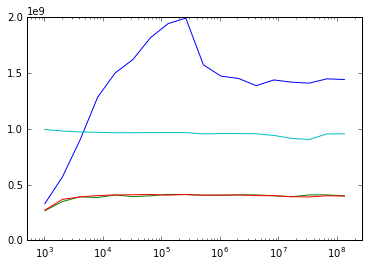

In [66]:
py = df[df["language"] == "python"]
plt.semilogx(py["length"], py["rate"])
js = df[df["language"] == "node.js"]
js0 = js[js["name"] == "sum_loop"]
plt.semilogx(js0["length"], js0["rate"])
js1 = js[js["name"] == "ops.sum"]
plt.semilogx(js1["length"], js1["rate"])
cxx = df[df["language"] == "c++"]
plt.semilogx(cxx["length"], cxx["rate"])
# plt.gcf().set_figwidth(20)

plt.gca().set_xlim(df["length"].min() / 2, df["length"].max() * 2)
plt.gca().set_ylim(0);

In [72]:
df[abs(df["length"] - 128 * 1024**2) < 1000]

,arch,count,host,language,language_ver,length,mem_size,name,operation,os,os_ver,samples,time,timestamp,type,rate
17,x86_64,1,sorrel.local,python,3.5.1,134217728,1073741824,numpy.sum,sum,Darwin,14.5.0,100,0.093049,2016-08-08T19:52:39Z,f64,1.442436e+09
52,x64,1,sorrel.local,node.js,6.3.1,134217728,1073741824,sum_loop,sum,Darwin,14.5.0,100,0.335323,2016-08-08T19:54:58.592Z,f64,4.002644e+08
53,x64,1,sorrel.local,node.js,6.3.1,134217728,1073741824,ops.sum,sum,Darwin,14.5.0,100,0.337817,2016-08-08T19:55:35.014Z,f64,3.973089e+08
71,x86_64,1,sorrel.local,c++,4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1...,134218000,1073740000,sum,sum,Darwin,Darwin Kernel Version 14.5.0: Wed Jul 29 02:26...,100,0.140462,2016-08-08T19:56:08Z,f64,9.555467e+08


In [13]:
sum_filter = pd.DataFrame.from_records([ json.loads(l) for l in open("filter-sum.json") ])
sum_filter["rate"] = sum_filter["length"] / sum_filter["time"]
sum_filter[sum_filter.length == 1 << 23]

,arch,count,host,language,language_ver,length,mem_size,name,operation,os,os_ver,samples,time,timestamp,type,rate
39,x64,1,sorrel.local,node.js,6.3.1,8388608,67108864,filter_sum_loop,filter-sum,Darwin,14.5.0,100,0.060418,2016-08-21T10:38:46.637Z,f64,1.388434e+08
40,x64,1,sorrel.local,node.js,6.3.1,8388608,67108864,filter_sum,filter-sum,Darwin,14.5.0,100,0.432323,2016-08-21T10:39:33.446Z,f64,1.940356e+07
41,x64,1,sorrel.local,node.js,6.3.1,8388608,67108864,filter_sum_reduce,filter-sum,Darwin,14.5.0,100,0.223298,2016-08-21T10:39:57.013Z,f64,3.756692e+07
55,x86_64,1,sorrel.local,python,3.5.1,8388608,67108864,np_filter_sum,filter-sum,Darwin,14.5.0,100,0.062527,2016-08-21T15:50:02Z,f64,1.341600e+08


In [11]:
1 << 23

8388608